In [1]:
import numpy as np
import pandas as pd
from linear_regression import LinearRegression1
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/Users/macbook/Desktop/My Projects/Linear Regression From Scratch/real_estate_listings.csv")

In [3]:
df

,Price,Currency,Location,Rooms,Area,Floor
0,140 000,AZN,İnşaatçılar m.,2 otaqlı,50 m²,4/5 mərtəbə
1,414 000,AZN,Gənclik m.,3 otaqlı,140.8 m²,15/17 mərtəbə
2,235 000,AZN,28 May m.,3 otaqlı,70 m²,6/6 mərtəbə
3,335 000,AZN,Nəsimi r.,3 otaqlı,150 m²,4/17 mərtəbə
4,159 000,AZN,Həzi Aslanov m.,2 otaqlı,76 m²,11/16 mərtəbə
...,...,...,...,...,...,...
1423,204 000,AZN,Yasamal r.,3 otaqlı,90 m²,9/9 mərtəbə
1424,166 000,AZN,Bakıxanov q.,3 otaqlı,91 m²,12/14 mərtəbə
1425,420 000,AZN,Elmlər Akademiyası m.,3 otaqlı,119.1 m²,11/18 mərtəbə
1426,1 200 000,AZN,Gənclik m.,5 otaqlı,300 m²,4/9 mərtəbə


In [4]:
df[df.duplicated()]

,Price,Currency,Location,Rooms,Area,Floor
66,358 000,AZN,Nəsimi r.,3 otaqlı,126 m²,9/16 mərtəbə
269,358 000,AZN,Nəsimi r.,3 otaqlı,126 m²,9/16 mərtəbə
282,155 000,AZN,Xətai r.,3 otaqlı,115 m²,19/21 mərtəbə
308,210 775,AZN,Nərimanov r.,2 otaqlı,84.3 m²,8/14 mərtəbə
317,120 000,AZN,Həzi Aslanov m.,2 otaqlı,52 m²,4/9 mərtəbə
...,...,...,...,...,...,...
1423,204 000,AZN,Yasamal r.,3 otaqlı,90 m²,9/9 mərtəbə
1424,166 000,AZN,Bakıxanov q.,3 otaqlı,91 m²,12/14 mərtəbə
1425,420 000,AZN,Elmlər Akademiyası m.,3 otaqlı,119.1 m²,11/18 mərtəbə
1426,1 200 000,AZN,Gənclik m.,5 otaqlı,300 m²,4/9 mərtəbə


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312 entries, 0 to 1411
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     1312 non-null   object
 1   Currency  1312 non-null   object
 2   Location  1312 non-null   object
 3   Rooms     1312 non-null   object
 4   Area      1312 non-null   object
 5   Floor     1312 non-null   object
dtypes: object(6)
memory usage: 71.8+ KB


In [7]:
df.reset_index(inplace=True, drop=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     1312 non-null   object
 1   Currency  1312 non-null   object
 2   Location  1312 non-null   object
 3   Rooms     1312 non-null   object
 4   Area      1312 non-null   object
 5   Floor     1312 non-null   object
dtypes: object(6)
memory usage: 61.6+ KB


In [9]:
df

,Price,Currency,Location,Rooms,Area,Floor
0,140 000,AZN,İnşaatçılar m.,2 otaqlı,50 m²,4/5 mərtəbə
1,414 000,AZN,Gənclik m.,3 otaqlı,140.8 m²,15/17 mərtəbə
2,235 000,AZN,28 May m.,3 otaqlı,70 m²,6/6 mərtəbə
3,335 000,AZN,Nəsimi r.,3 otaqlı,150 m²,4/17 mərtəbə
4,159 000,AZN,Həzi Aslanov m.,2 otaqlı,76 m²,11/16 mərtəbə
...,...,...,...,...,...,...
1307,310 000,AZN,20 Yanvar m.,3 otaqlı,130 m²,4/16 mərtəbə
1308,155 000,AZN,Nizami r.,3 otaqlı,95 m²,10/18 mərtəbə
1309,250 000,AZN,Bakıxanov q.,4 otaqlı,110 m²,3/5 mərtəbə
1310,170 000,AZN,Avtovağzal m.,3 otaqlı,113 m²,8/15 mərtəbə


In [10]:
df.drop(["Currency", "Location"], axis=1, inplace=True)

In [11]:
df

,Price,Rooms,Area,Floor
0,140 000,2 otaqlı,50 m²,4/5 mərtəbə
1,414 000,3 otaqlı,140.8 m²,15/17 mərtəbə
2,235 000,3 otaqlı,70 m²,6/6 mərtəbə
3,335 000,3 otaqlı,150 m²,4/17 mərtəbə
4,159 000,2 otaqlı,76 m²,11/16 mərtəbə
...,...,...,...,...
1307,310 000,3 otaqlı,130 m²,4/16 mərtəbə
1308,155 000,3 otaqlı,95 m²,10/18 mərtəbə
1309,250 000,4 otaqlı,110 m²,3/5 mərtəbə
1310,170 000,3 otaqlı,113 m²,8/15 mərtəbə


In [12]:
def eraseStringInRooms(col):
    col_items = str(col).split(" ")
    col = int(col_items[0])
    return col

def eraseStringInArea(col):
    col_items = str(col).split(" ")
    col = float(col_items[0])
    return col

def eraseSpaceInPrice(col):
    col_items = str(col).split(" ")
    col = int(col_items[0] + col_items[1])
    return col

In [13]:
df['Rooms'] = df['Rooms'].apply(eraseStringInRooms)
df['Area'] = df['Area'].apply(eraseStringInArea)
df['Price'] = df['Price'].apply(eraseSpaceInPrice)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1312 non-null   int64  
 1   Rooms   1312 non-null   int64  
 2   Area    1312 non-null   float64
 3   Floor   1312 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 41.1+ KB


In [15]:
Floor_splitted = df['Floor'].str.replace(" mərtəbə", "").str.split("/")
df['Height'] = 0
for i in range(len(Floor_splitted)):
    df.loc[i, 'Floor'] = Floor_splitted[i][0]
    df.loc[i, 'Height'] = int(Floor_splitted[i][1])

In [16]:
df['Floor'] = df['Floor'].apply(int)

In [17]:
df

,Price,Rooms,Area,Floor,Height
0,140000,2,50.0,4,5
1,414000,3,140.8,15,17
2,235000,3,70.0,6,6
3,335000,3,150.0,4,17
4,159000,2,76.0,11,16
...,...,...,...,...,...
1307,310000,3,130.0,4,16
1308,155000,3,95.0,10,18
1309,250000,4,110.0,3,5
1310,170000,3,113.0,8,15


In [18]:
X = df[['Rooms', 'Floor', 'Height', 'Area']]
Y = df['Price']

In [19]:
X

,Rooms,Floor,Height,Area
0,2,4,5,50.0
1,3,15,17,140.8
2,3,6,6,70.0
3,3,4,17,150.0
4,2,11,16,76.0
...,...,...,...,...
1307,3,4,16,130.0
1308,3,10,18,95.0
1309,4,3,5,110.0
1310,3,8,15,113.0


In [20]:
Y

0       140000
1       414000
2       235000
3       335000
4       159000
         ...  
1307    310000
1308    155000
1309    250000
1310    170000
1311    188000
Name: Price, Length: 1312, dtype: int64

In [21]:
model = LinearRegression1()

In [22]:
w = [1, 1, 1, 1]

In [23]:
model.costFunction(X, Y, w)

np.float64(48469020010.34784)

In [24]:
model.fit(X, Y)

Early stopping at epoch 7703, cost difference: 0.0


In [25]:
np.set_printoptions(suppress=True)
Y_pred = model.predict(X)

In [26]:
Y_pred

array([164183.6512092 , 333408.1921673 , 195134.62864859, ...,
       261946.82304179, 283543.20123816, 220077.50376538], shape=(1312,))

In [27]:
from sklearn.linear_model import LinearRegression

model_real = LinearRegression()

model_real.fit(X, Y)

Y_pred_real = model_real.predict(X)

In [28]:
Y_pred - Y

0        24183.651209
1       -80591.807833
2       -39865.371351
3        19824.838829
4        63165.524927
            ...      
1307      7330.541213
1308     98864.843740
1309     11946.823042
1310    113543.201238
1311     32077.503765
Name: Price, Length: 1312, dtype: float64

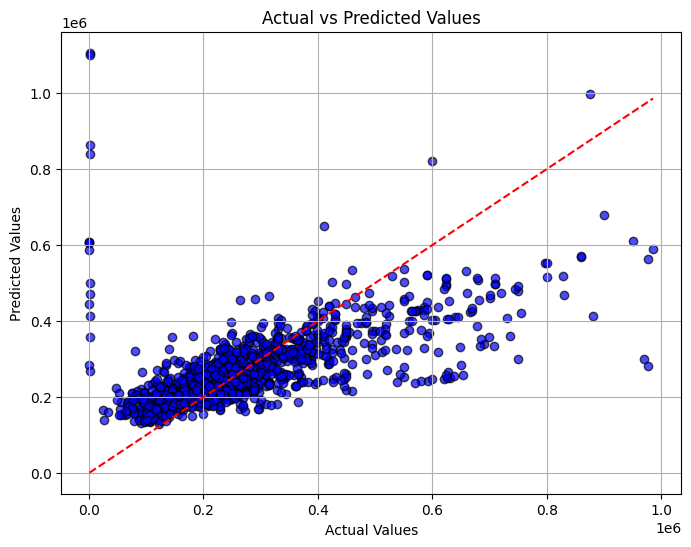

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(Y, Y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

In [30]:
model.score(X, Y)

np.float64(0.3912458236401598)

In [31]:
model.predict([3, 10, 10, 150.0])

array([343384.25867255])

In [32]:
model.score(X, Y)

np.float64(0.3912458236401598)